In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

In [2]:
# Replace the URL below with the actual URL of the CSV file you want to download
url = "https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/zomato/zomato.csv"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Save the content to a file
with open("Zomato.csv", "wb") as file:
    file.write(response.content)

In [3]:
df_Zom_res_data = pd.read_csv("E:/DATA SCIENCE - COURSE - GUVI/GUVI Project/Zomoto Data Analysis and Visualisation/Zomato.csv")
df_Zom_res_data.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [4]:
df_country_data = pd.read_excel("E:/DATA SCIENCE - COURSE - GUVI/GUVI Project/Zomoto Data Analysis and Visualisation/Country-Code.xlsx")
df_country_data

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [5]:
df_zomato_combined = pd.merge(df_Zom_res_data,df_country_data,on='Country Code',how='left')
df_zomato_combined.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [6]:
df_zomato_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Check for missing values in the dataset and print the percentage of missing values for each column.

In [7]:
count = df_zomato_combined.isnull().sum().sort_values(ascending=False)
percent = (df_zomato_combined.isnull().sum()/len(df_zomato_combined)*100).sort_values(ascending=False)
data = pd.concat([count, percent], axis=1,keys=['count','percent'])
data

,count,percent
Cuisines,9,0.094231
Restaurant ID,0,0.000000
Country Code,0,0.000000
City,0,0.000000
Address,0,0.000000
Restaurant Name,0,0.000000
Locality,0,0.000000
Locality Verbose,0,0.000000
Longitude,0,0.000000
Latitude,0,0.000000


In [8]:
#Removing columns
df_zomato_combined.drop(columns = ['Longitude', 'Latitude', 'Restaurant ID','Address','Locality Verbose'], axis=1, inplace = True)

In [9]:
df_zomato_combined.head(2)

,Restaurant Name,Country Code,City,Locality,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [10]:
# Replace 'Pounds(專)' with 'Pounds(£)' in the 'Currency' column
df_zomato_combined['Currency'] = df_zomato_combined['Currency'].replace('Pounds(專)', 'Pounds(£)')


In [11]:
#Renaming Columns

df_zomato_combined.rename({'Has Table booking':'Accepts_Table_Booking','Rating color':'Rating_Schema','Rating text':'Rating',
                'Average Cost for two':'Avg_Cost','Has Online delivery':'Online Delivery','Aggregate rating':'Aggregate_Rating'},
                axis=1,inplace=True)

df_zomato_combined.head(2)

,Restaurant Name,Country Code,City,Locality,Cuisines,Avg_Cost,Currency,Accepts_Table_Booking,Online Delivery,Is delivering now,Switch to order menu,Price range,Aggregate_Rating,Rating_Schema,Rating,Votes,Country
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [12]:
conversion_rates = {
    'Indian Rupee(Rs.)': 1.00,         # 1 INR = 1 INR
    'Dollar($)': 82.00,                # 1 USD = 82.00 INR
    'Pounds(£)': 101.50,               # 1 GBP = 101.50 INR
    'Brazilian Real(R$)': 17.20,       # 1 Real = 17.20 INR
    'Emirati Diram(AED)': 22.30,       # 1 AED = 22.30 INR
    'Rand(R)': 4.49,                   # 1 ZAR = 4.49 INR
    'NewZealand($)': 50.60,            # 1 NZD = 50.60 INR
    'Turkish Lira(TL)': 2.95,          # 1 TL = 2.95 INR
    'Botswana Pula(P)': 6.10,          # 1 Pula = 6.10 INR
    'Indonesian Rupiah(IDR)': 0.0055,  # 1 IDR = 0.0055 INR
    'Qatari Rial(QR)': 22.55,          # 1 QAR = 22.55 INR
    'Sri Lankan Rupee(LKR)': 0.26,     # 1 LKR = 0.26 INR
}
# Add the exchange rate column to the DataFrame
df_zomato_combined['Exchange Rate (to INR)'] = df_zomato_combined['Currency'].map(conversion_rates).fillna(1.00)

# Multiplying 'Exchange Rate' with average column for two for the converted cost
df_zomato_combined['Converted Cost (INR)'] = df_zomato_combined['Avg_Cost'] * df_zomato_combined['Exchange Rate (to INR)']
df_zomato_combined.head(2)

,Restaurant Name,Country Code,City,Locality,Cuisines,Avg_Cost,Currency,Accepts_Table_Booking,Online Delivery,Is delivering now,Switch to order menu,Price range,Aggregate_Rating,Rating_Schema,Rating,Votes,Country,Exchange Rate (to INR),Converted Cost (INR)
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,6.1,6710.0
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,6.1,7320.0


In [13]:
df_zomato_combined[df_zomato_combined["Country"] == "India"]

,Restaurant Name,Country Code,City,Locality,Cuisines,Avg_Cost,Currency,Accepts_Table_Booking,Online Delivery,Is delivering now,Switch to order menu,Price range,Aggregate_Rating,Rating_Schema,Rating,Votes,Country,Exchange Rate (to INR),Converted Cost (INR)
624,Jahanpanah,1,Agra,Agra Cantt,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140,India,1.0,850.0
625,Rangrezz Restaurant,1,Agra,Agra Cantt,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71,India,1.0,700.0
626,Time2Eat - Mama Chicken,1,Agra,Agra Cantt,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94,India,1.0,500.0
627,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,Civil Lines,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87,India,1.0,400.0
628,Pinch Of Spice,1,Agra,Civil Lines,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177,India,1.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,D Cabana,1,Vizag,Sagar Nagar,"Continental, Seafood, Chinese, North Indian, B...",600,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,193,India,1.0,600.0
9272,Kaloreez,1,Vizag,Siripuram,"Cafe, North Indian, Chinese",400,Indian Rupees(Rs.),No,No,No,No,2,3.7,Yellow,Good,85,India,1.0,400.0
9273,Plot 17,1,Vizag,Siripuram,"Burger, Pizza, Biryani",600,Indian Rupees(Rs.),No,No,No,No,2,4.3,Green,Very Good,172,India,1.0,600.0
9274,Vista - The Park,1,Vizag,"The Park, Lawsons Bay","American, North Indian, Thai, Continental",1500,Indian Rupees(Rs.),No,No,No,No,4,3.8,Yellow,Good,74,India,1.0,1500.0


In [14]:
df_zomato_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Restaurant Name         9551 non-null   object 
 1   Country Code            9551 non-null   int64  
 2   City                    9551 non-null   object 
 3   Locality                9551 non-null   object 
 4   Cuisines                9542 non-null   object 
 5   Avg_Cost                9551 non-null   int64  
 6   Currency                9551 non-null   object 
 7   Accepts_Table_Booking   9551 non-null   object 
 8   Online Delivery         9551 non-null   object 
 9   Is delivering now       9551 non-null   object 
 10  Switch to order menu    9551 non-null   object 
 11  Price range             9551 non-null   int64  
 12  Aggregate_Rating        9551 non-null   float64
 13  Rating_Schema           9551 non-null   object 
 14  Rating                  9551 non-null   

### Exploratory Analysis and Visualization

In [15]:
subset_df = df_zomato_combined[['Aggregate_Rating','Rating_Schema','Rating','Votes']]
subset_df

,Aggregate_Rating,Rating_Schema,Rating,Votes
0,4.8,Dark Green,Excellent,314
1,4.5,Dark Green,Excellent,591
2,4.4,Green,Very Good,270
3,4.9,Dark Green,Excellent,365
4,4.8,Dark Green,Excellent,229
...,...,...,...,...
9546,4.1,Green,Very Good,788
9547,4.2,Green,Very Good,1034
9548,3.7,Yellow,Good,661
9549,4.0,Green,Very Good,901


In [16]:
subset_df['Rating_Schema'].value_counts()

Rating_Schema
Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: count, dtype: int64

In [17]:
subset_df['Rating'].value_counts()

Rating
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

In [18]:
#accepting the table booking
df_zomato_combined['Accepts_Table_Booking'].value_counts()

Accepts_Table_Booking
No     8393
Yes    1158
Name: count, dtype: int64

In [19]:
df_zomato_combined.describe()

,Country Code,Avg_Cost,Price range,Aggregate_Rating,Votes,Exchange Rate (to INR),Converted Cost (INR)
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,1199.210763,1.804837,2.666370,156.909748,6.454844,838.951907
std,56.750546,16121.183073,0.905609,1.516378,430.169145,20.047993,1385.555382
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.005500,0.000000
25%,1.000000,250.000000,1.000000,2.500000,5.000000,1.000000,300.000000
50%,1.000000,400.000000,2.000000,3.200000,31.000000,1.000000,500.000000
75%,1.000000,700.000000,2.000000,3.700000,131.000000,1.000000,820.000000
max,216.000000,800000.000000,4.000000,4.900000,10934.000000,101.500000,41000.000000


<Axes: >

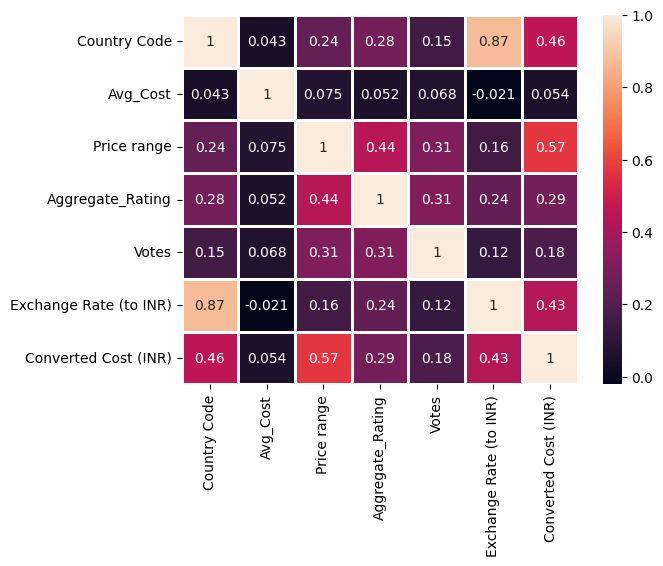

In [20]:
#Correlation between the variables 

# Select only numeric columns
numeric_df = df_zomato_combined.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, linewidths=2)

### TASK - 1

In [21]:
# Prepare the data for plotting
plot_data = []
for currency_name, inr_to_currency in conversion_rates.items():
    plot_data.append({
        'Currency': currency_name,
        'INR Equivalent': inr_to_currency
    })

# Convert to DataFrame
plot_df = pd.DataFrame(plot_data)

# Plot the comparison using Plotly
fig = px.bar(plot_df, x='Currency', y='INR Equivalent',
             title='Comparison of Indian Rupee (INR) with Other Currencies',
             labels={'INR Equivalent': 'INR to 1 Currency'},
             text='INR Equivalent')

# Show the plot
fig.show()

In [22]:
# Splitting the cuisines column into individual cuisines
df_zomato_combined['Cuisines'] = df_zomato_combined['Cuisines'].str.split(', ')

# Explode the lists to create a new row for each cuisine
df_zomato_final = df_zomato_combined.explode('Cuisines')

# Now you can use groupby to get counts for each cuisine
cuisine_counts = df_zomato_final['Cuisines'].value_counts()

# Print the counts
cuisine_counts

Cuisines
North Indian      3960
Chinese           2735
Fast Food         1986
Mughlai            995
Italian            764
                  ... 
Cuisine Varies       1
Fish and Chips       1
Durban               1
D韄ner                1
B韄rek                1
Name: count, Length: 145, dtype: int64

In [23]:
df_zomato_final

,Restaurant Name,Country Code,City,Locality,Cuisines,Avg_Cost,Currency,Accepts_Table_Booking,Online Delivery,Is delivering now,Switch to order menu,Price range,Aggregate_Rating,Rating_Schema,Rating,Votes,Country,Exchange Rate (to INR),Converted Cost (INR)
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City",French,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,6.10,6710.00
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City",Japanese,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,6.10,6710.00
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City",Desserts,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,6.10,6710.00
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,6.10,7320.00
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",Seafood,4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines,6.10,24400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9547,Ceviz A埕ac郾,208,哿stanbul,Ko侓uyolu,Cafe,105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034,Turkey,2.95,309.75
9548,Huqqa,208,哿stanbul,Kuru韄e侓me,Italian,170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,Turkey,2.95,501.50
9548,Huqqa,208,哿stanbul,Kuru韄e侓me,World Cuisine,170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661,Turkey,2.95,501.50
9549,A侓侓k Kahve,208,哿stanbul,Kuru韄e侓me,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901,Turkey,2.95,354.00


In [24]:
df_zomato_combined.head()

,Restaurant Name,Country Code,City,Locality,Cuisines,Avg_Cost,Currency,Accepts_Table_Booking,Online Delivery,Is delivering now,Switch to order menu,Price range,Aggregate_Rating,Rating_Schema,Rating,Votes,Country,Exchange Rate (to INR),Converted Cost (INR)
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City","[French, Japanese, Desserts]",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,6.1,6710.0
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",[Japanese],1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,6.1,7320.0
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City","[Seafood, Asian, Filipino, Indian]",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines,6.1,24400.0
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","[Japanese, Sushi]",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines,6.1,9150.0
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City","[Japanese, Korean]",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines,6.1,9150.0


In [25]:
df_zomato_final['Country'].unique()

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

In [26]:
df_zomato_final.head()

,Restaurant Name,Country Code,City,Locality,Cuisines,Avg_Cost,Currency,Accepts_Table_Booking,Online Delivery,Is delivering now,Switch to order menu,Price range,Aggregate_Rating,Rating_Schema,Rating,Votes,Country,Exchange Rate (to INR),Converted Cost (INR)
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City",French,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,6.1,6710.0
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City",Japanese,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,6.1,6710.0
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City",Desserts,1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,6.1,6710.0
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,6.1,7320.0
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",Seafood,4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines,6.1,24400.0


In [27]:
df_zomato_final.shape

(19719, 19)

In [28]:
df_zomato_final[df_zomato_final['Country'] == 'United Kingdom']


,Restaurant Name,Country Code,City,Locality,Cuisines,Avg_Cost,Currency,Accepts_Table_Booking,Online Delivery,Is delivering now,Switch to order menu,Price range,Aggregate_Rating,Rating_Schema,Rating,Votes,Country,Exchange Rate (to INR),Converted Cost (INR)
9337,Pepe's Piri Piri,215,Birmingham,Alum Rock,Fast Food,10,Pounds(£),No,No,No,No,1,2.8,Orange,Average,26,United Kingdom,101.5,1015.0
9338,Ju Ju's Cafe,215,Birmingham,Brindleyplace,Cafe,15,Pounds(£),No,No,No,No,1,3.7,Yellow,Good,13,United Kingdom,101.5,1522.5
9338,Ju Ju's Cafe,215,Birmingham,Brindleyplace,British,15,Pounds(£),No,No,No,No,1,3.7,Yellow,Good,13,United Kingdom,101.5,1522.5
9339,Bank,215,Birmingham,"Brindleyplace, Broad Street",British,60,Pounds(£),Yes,No,No,No,3,4.0,Green,Very Good,133,United Kingdom,101.5,6090.0
9339,Bank,215,Birmingham,"Brindleyplace, Broad Street",Steak,60,Pounds(£),Yes,No,No,No,3,4.0,Green,Very Good,133,United Kingdom,101.5,6090.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9414,San Carlo,215,Manchester,Spinningfields,Italian,25,Pounds(£),No,No,No,No,2,4.3,Green,Very Good,745,United Kingdom,101.5,2537.5
9415,Mr Cooper's House & Garden - The Midland,215,Manchester,"The Midland, Deansgate",European,55,Pounds(£),Yes,No,No,No,3,4.2,Green,Very Good,67,United Kingdom,101.5,5582.5
9415,Mr Cooper's House & Garden - The Midland,215,Manchester,"The Midland, Deansgate",Mediterranean,55,Pounds(£),Yes,No,No,No,3,4.2,Green,Very Good,67,United Kingdom,101.5,5582.5
9415,Mr Cooper's House & Garden - The Midland,215,Manchester,"The Midland, Deansgate",Contemporary,55,Pounds(£),Yes,No,No,No,3,4.2,Green,Very Good,67,United Kingdom,101.5,5582.5


In [29]:
final_data = df_zomato_final.to_csv('Zomato_final.csv', index=False)
df_zomato_final.to_csv('E:/DATA SCIENCE - COURSE - GUVI/GUVI Project/Zomoto Data Analysis and Visualisation/Zomato_final.csv', index=False)

In [33]:
import pandas as pd
import plotly.express as px
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go # or plotly.express as px
fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)
from dash import Dash

df_zomato_final = pd.read_csv("E:/DATA SCIENCE - COURSE - GUVI/GUVI Project/Zomoto Data Analysis and Visualisation/Zomato_final.csv")

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Restaurant Analysis Dashboard"),

    # Dropdown for country selection
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in df_zomato_final['Country'].unique()],
        value="India",
        multi=False,
        style={'width': '50%'}
    ),

    # Cuisine Analysis
    dcc.Graph(id='cuisine-analysis'),

    # Ratings Analysis
    dcc.Graph(id='ratings-analysis'),

    # Delivery Services
    dcc.Graph(id='delivery-services'),

    # Cost Analysis
    dcc.Graph(id='cost-analysis'),

    # Display the most costly cuisine
    html.Div(id='most-costly-cuisine', style={'margin-top': '20px', 'font-size': '18px'})
])

# Callback to update graphs based on user input
@app.callback(
    [Output('cuisine-analysis', 'figure'),
     Output('ratings-analysis', 'figure'),
     Output('delivery-services', 'figure'),
     Output('cost-analysis', 'figure'),
     Output('most-costly-cuisine', 'children')],
    [Input('country-dropdown', 'value')]
)
def update_graphs(selected_country):
    # Filter DataFrame based on user input
    df_filter = df_zomato_final[df_zomato_final['Country'] == selected_country]

    # Cuisine Analysis
    fig_cuisine = px.bar(df_filter,x='Cuisines',title='Cuisine Analysis',color_discrete_sequence=px.colors.qualitative.Set1,
    hover_data={'Cuisines': True}  ) # Enables hover data for the 'Cuisines' column)   
    # Ratings Analysis - Restaurant-wise
    fig_ratings = px.bar(df_filter, x='Restaurant Name', y='Aggregate_Rating', title='Ratings Analysis', color_discrete_sequence=px.colors.qualitative.Set2)

    # Delivery Services
    fig_delivery = px.pie(df_filter.drop_duplicates(subset=['Restaurant Name']), names='Online Delivery', title='Delivery Services', color_discrete_sequence=px.colors.qualitative.Plotly)

    # Cost Analysis using Converted Cost (INR)
    fig_cost = px.box(df_filter.groupby('Cuisines').agg({'Converted Cost (INR)': 'mean'}).reset_index(), x='Cuisines', y='Converted Cost (INR)', title='Cost Analysis',hover_data={'Converted Cost (INR)': True}, color_discrete_sequence=px.colors.qualitative.Set3)

    # Find the most costly cuisine
    most_costly_cuisine = df_filter.groupby('Cuisines')['Converted Cost (INR)'].mean().idxmax()

    return fig_cuisine, fig_ratings, fig_delivery, fig_cost, f'The most costly cuisine is "{most_costly_cuisine}"'

if __name__ == '__main__':
    app.run_server(debug=True, port=8050)

In [31]:
import pandas as pd
import plotly.express as px
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go # or plotly.express as px
fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)
from dash import Dash
import dash

df_zomato_final = pd.read_csv("E:/DATA SCIENCE - COURSE - GUVI/GUVI Project/Zomoto Data Analysis and Visualisation/Zomato_final.csv")


# Create Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("City Analysis Dashboard"),

    # Dropdown for country selection
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in df_zomato_final['Country'].unique()],
        value='India',
        multi=False,
        style={'width': '50%'}
    ),

    # Dropdown for city selection
    dcc.Dropdown(
        id='city-dropdown',
        multi=False,
        style={'width': '50%'}
    ),

    # Famous Cuisine in the City
    dcc.Graph(id='famous-cuisine'),

    # Costlier Cuisine in the City
    dcc.Graph(id='costlier-cuisine'),

    # Rating Count in the City
    dcc.Graph(id='rating-count'),

    # Pie Chart Online Delivery vs Dine-In
    dcc.Graph(id='delivery-mode')
])

# Callback to update city dropdown based on country selection
@app.callback(
    Output('city-dropdown', 'options'),
    [Input('country-dropdown', 'value')]
)
def update_cities(selected_country):
    cities = df_zomato_final[df_zomato_final['Country'] == selected_country]['City'].unique()
    city_options = [{'label': city, 'value': city} for city in cities]
    return city_options

# Callback to update graphs based on user input
@app.callback(
    [Output('famous-cuisine', 'figure'),
     Output('costlier-cuisine', 'figure'),
     Output('rating-count', 'figure'),
     Output('delivery-mode', 'figure')],
    [Input('country-dropdown', 'value'),
     Input('city-dropdown', 'value')]
)
def update_city_graphs(selected_country, selected_city):
    # Filter DataFrame based on user input
    filtered_df = df_zomato_final[(df_zomato_final['Country'] == selected_country) & (df_zomato_final['City'] == selected_city)]

    # Famous Cuisine in the City
    fig_famous_cuisine = px.bar(
        filtered_df['Cuisines'].value_counts().nlargest(10).reset_index(),
        x='Cuisines',  # 'index' is the column name created by reset_index() for cuisine names
        y='count',  # Number of occurrences
        title='Famous Cuisine in the City',
        labels={'index': 'Cuisine', 'Cuisines': 'Number of Occurrences'},
        color_discrete_sequence=px.colors.qualitative.Plotly
    )
    # Add data labels to the bar chart
    fig_famous_cuisine.update_traces(texttemplate='%{y}', textposition='outside')


    # Costlier Cuisine in the City
    fig_costlier_cuisine = px.box(filtered_df.groupby('Cuisines').agg({'Converted Cost (INR)': 'mean'}).reset_index(), x='Cuisines', y='Converted Cost (INR)', title='Costlier Cuisine in the City',color_discrete_sequence=px.colors.qualitative.Plotly)

    
    # Rating Count in the City
    fig_rating_count = px.bar(filtered_df, x='Cuisines', y='Votes', title='Rating Count in the City',color_discrete_sequence=px.colors.qualitative.Plotly)
    # Add data labels to the bar chart
    fig_rating_count.update_traces(texttemplate='%{y}', textposition='outside')


    # Pie Chart Online Delivery vs Dine-In
    fig_delivery_mode = px.pie(filtered_df, names='Online Delivery', title='Delivery Mode in the City', color_discrete_sequence=px.colors.qualitative.Plotly)
    # Show percentage labels on the pie chart
    fig_delivery_mode.update_traces(textinfo='percent+label')

    return fig_famous_cuisine, fig_costlier_cuisine, fig_rating_count, fig_delivery_mode

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)


In [32]:
import pandas as pd
import plotly.express as px
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objects as go # or plotly.express as px
fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)
from dash import Dash
import dash

df_zomato_final = pd.read_csv("E:/DATA SCIENCE - COURSE - GUVI/GUVI Project/Zomoto Data Analysis and Visualisation/Zomato_final.csv")


# Filter data for India
india_df = df_zomato_final[df_zomato_final['Country'] == 'India']

# Report 1: Comparison Between Cities in India
fig_cities = px.bar(
    india_df.groupby('City').size().reset_index(),
    x='City', y=0, title='Number of Restaurants per City',
    color_discrete_sequence=px.colors.qualitative.Plotly  # Change color scheme
)
fig_cities.update_traces(texttemplate='%{y}', textposition='outside')  # Add labels

# Report 2: Online Delivery Expenses in Different Cities
fig_online_delivery = px.bar(
    india_df.groupby(['City', 'Online Delivery']).size().reset_index(),
    x='City', y=0, color='Online Delivery',
    title='Online Delivery Expenses in Different Cities',
    color_discrete_sequence=px.colors.qualitative.Plotly
)
fig_online_delivery.update_traces(texttemplate='%{y}', textposition='outside')

# Report 3: Dine-In Expenses in Different Cities
fig_dine_in = px.bar(
    india_df.groupby(['City', 'Accepts_Table_Booking']).size().reset_index(),
    x='City', y=0, color='Accepts_Table_Booking',
    title='Dine-In Expenses in Different Cities',
    color_discrete_sequence=px.colors.qualitative.Plotly
)
fig_dine_in.update_traces(texttemplate='%{y}', textposition='outside')

# Report 4: High Living Cost vs. Low Living Cost
fig_cost_cities = px.bar(
    india_df.groupby('City')['Avg_Cost'].mean().reset_index(),
    x='City', y='Avg_Cost',
    title='Average Cost for Two in Different Cities',
    color_discrete_sequence=px.colors.qualitative.Plotly
)
fig_cost_cities.update_traces(texttemplate='%{y:.2f}', textposition='outside')

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1('Restaurant Dashboard', style={'textAlign': 'center', 'backgroundColor': '#f0f0f0', 'padding': '10px'}),

    # Report 1
    html.Div([
        dcc.Graph(figure=fig_cities)
    ], style={'width': '100%', 'display': 'block', 'border': '2px solid #2c3e50', 'backgroundColor': '#ecf0f1', 'padding': '20px', 'margin': '10px'}),

    # Report 2
    html.Div([
        dcc.Graph(figure=fig_online_delivery)
    ], style={'width': '100%', 'display': 'block', 'border': '2px solid #2c3e50', 'backgroundColor': '#ecf0f1', 'padding': '20px', 'margin': '10px'}),

    # Report 3
    html.Div([
        dcc.Graph(figure=fig_dine_in)
    ], style={'width': '100%', 'display': 'block', 'border': '2px solid #2c3e50', 'backgroundColor': '#ecf0f1', 'padding': '20px', 'margin': '10px'}),

    # Report 4
    html.Div([
        dcc.Graph(figure=fig_cost_cities)
    ], style={'width': '100%', 'display': 'block', 'border': '2px solid #2c3e50', 'backgroundColor': '#ecf0f1', 'padding': '20px', 'margin': '10px'}),
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8052)
